| MODE      | Magnet stack | Distance [mm] | Max U at breakdown [V] |
| --------- | ------------ | ------------- | ---------------------- |
| Repulsion | 1            | 82            | 7.15                   |
| Repulsion | 1            | 82            | 7.41                   |
| Repulsion | 2            | 82            | 8.73                   |
| Repulsion | 2            | 82            | 10.40                  |
| Repulsion | 2            | 82            | 10.51                  |
| Repulsion | 3            | 82            | 12.36                  |
| Repulsion | 3            | 82            | 13.07                  |
| Repulsion | 1            | 85            | 5.63                   |
| Repulsion | 1            | 85            | 5.58                   |
| Repulsion | 1            | 85            | 6.60                   |
| Repulsion | 2            | 85            | 10.95                  |
| Repulsion | 2            | 85            | 9.89                   |
| Repulsion | 2            | 83.5          | 10.26                  |
| Repulsion | 2            | 83.5          | 11.3                   |
| Repulsion | 2            | 83.5          | 10.37                  |
| Repulsion | 3            | 85            | 12.97                  |
| Repulsion | 3            | 85            | 13.13                  |
| Repulsion | 1            | 87            | 5.36                   |
| Repulsion | 1            | 87            | 5.76                   |
| Repulsion | 2            | 87            | 8.72                   |
| Repulsion | 2            | 87            | 8.33                   |
| Repulsion | 2            | 87            | 8.39                   |
| Repulsion | 3            | 87            | 9.86                   |
| Repulsion | 3            | 87            | 8.91                   |
| Repulsion | 2            | 92            | 5.15                   |
| Repulsion | 2            | 92            | 5.70                   |
| Repulsion | 2            | 92            | 4.63                   |
| Repulsion | 3            | 92            | 6.31                   |
| Repulsion | 3            | 92            | 6.99                   |


In [71]:
import math
import matplotlib.pyplot as plt
import matplotlib.lines as mpl_lines
import numpy as np

%matplotlib widget

# code modified to change negative values to positive ones
def lmap(f,x):
    return list(map(f,x))

def lfilter(f,x):
    return list(filter(f,x))

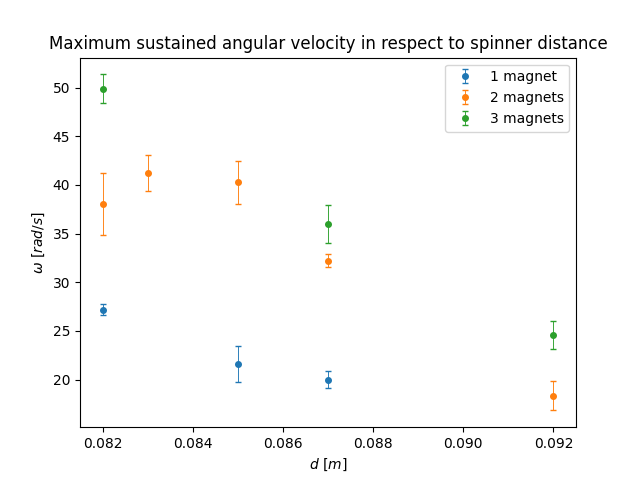

In [72]:
data = {
    1: {
        "U": [7.15, 7.41, 5.63, 5.58, 6.60, 5.36, 5.76],
        "r": [82, 82, 85, 85, 85, 87, 87],
    },
    2: {
        "U": [
            8.73,
            10.40,
            10.51,
            10.95,
            9.89,
            10.26,
            11.3,
            10.37,
            8.72,
            8.33,
            8.39,
            5.15,
            5.70,
            4.63,
        ],
        "r": [82, 82, 82, 85, 85, 83, 83, 83, 87, 87, 87, 92, 92, 92],
    },
    3: {
        # "U": [12.36, 13.07, 12.97, 13.13, 9.86, 8.91, 6.31, 6.99],
        # "r": [82, 82, 85, 85, 87, 87, 92, 92],
        "U": [12.36, 13.07, 9.86, 8.91, 6.31, 6.99],
        "r": [82, 82, 87, 87, 92, 92],
    },
}

drill_func = lambda U: 4.1728 * U + -3.1915
uniques = {}

for k in data.keys():
    datax = lmap(lambda x: x / 1000, data[k]["r"])
    datay = lmap(drill_func, data[k]["U"])
    unique = {"x": [], "y": [], "yerr": [], "U": []}

    for x in set(datax):
        Us = lmap(
            lambda i: data[k]["U"][i], lfilter(lambda i: x == datax[i], range(len(datax)))
        )
        ys = lmap(
            lambda i: datay[i], lfilter(lambda i: x == datax[i], range(len(datax)))
        )
        unique["x"].append(x)
        y_avg = np.average(ys)
        unique["y"].append(y_avg)
        unique["yerr"].append(np.average(lmap(lambda y: abs(y - y_avg), ys)))
        
        unique["U"].append(np.average(Us))

    (_, caps, _) = plt.errorbar(
        unique["x"],
        unique["y"],
        unique["yerr"],
        fmt="o",
        markersize=4,
        capsize=2,
        elinewidth=0.65,
        label = f"{k} magnet{'s' if k > 1 else ''}"
    )
    for cap in caps:
        cap.set_markeredgewidth(1)
    
    uniques[k] = unique

plt.title("Maximum sustained angular velocity in respect to spinner distance")
plt.ylabel("$\omega$ $[rad/s]$")
plt.xlabel("$d$ $[m]$")
plt.legend()

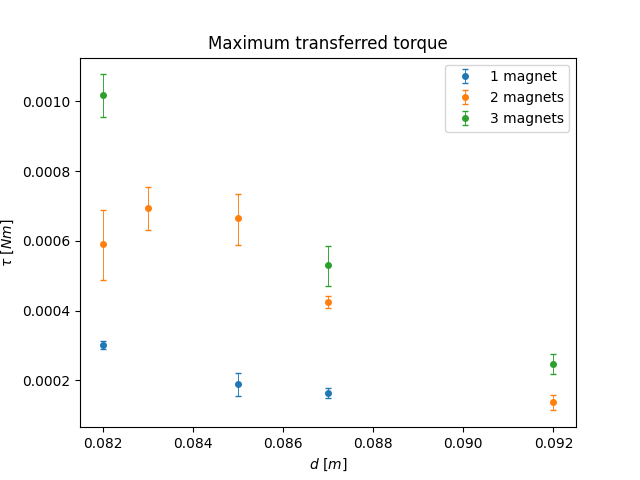

In [73]:
def torque(omeg):
    return 4.09201492e-07 * omeg ** 2

plt.figure()
for k in data.keys():
    torques = lmap(torque, uniques[k]["y"])
    (_, caps, _) = plt.errorbar(
        uniques[k]["x"],
        torques,
        yerr=[
            lmap(lambda i: abs(torque(uniques[k]["y"][i] + uniques[k]["yerr"][i]) - torques[i]), range(len(uniques[k]["y"]))),
            lmap(lambda i: abs(torque(uniques[k]["y"][i] - uniques[k]["yerr"][i]) - torques[i]), range(len(uniques[k]["y"])))
        ],
        fmt="o",
        markersize=4,
        capsize=2,
        elinewidth=0.65,
        label = f"{k} magnet{'s' if k > 1 else ''}"
    )
    for cap in caps:
        cap.set_markeredgewidth(1)
        

plt.title("Maximum transferred torque")
plt.ylabel("$\\tau$ $[Nm]$")
plt.xlabel("$d$ $[m]$")
plt.legend()

[0.30126656 0.29665644 0.29714515]
[0.31479565 0.30690089 0.29661151 0.31949553 0.31809739]
[0.33315873 0.29895676 0.31188138]


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


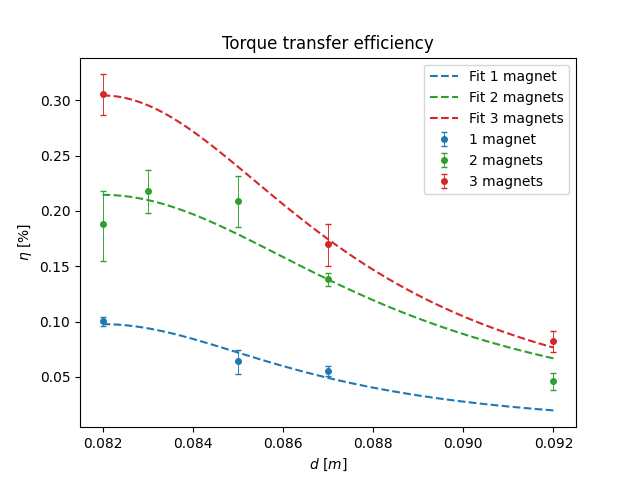

In [74]:
import scipy.optimize as opt

def torque(omeg):
    return 4.09201492e-07 * omeg ** 2

def current(U):
    return 0.0334 * U + 0.8819
    
cols = [
    "",
    "tab:blue",
    "tab:green",
    "tab:red",
]


efficiencies = {}

plt.figure()
for k in data.keys():
    torques = lmap(torque, uniques[k]["y"])
    in_torque = (np.array(uniques[k]["U"]) * lmap(current, np.array(uniques[k]["U"]))) / uniques[k]["y"] # approximately the current
    print(in_torque)
    
    efficiencies[k] = {}
    efficiencies[k]["x"] = uniques[k]["x"]
    efficiencies[k]["y"] = torques / in_torque * 100
    efficiencies[k]["yerr"] = [
        lmap(lambda i: 100 * abs(torque(uniques[k]["y"][i] + uniques[k]["yerr"][i]) - torques[i]) / in_torque[i], range(len(uniques[k]["y"]))),
        lmap(lambda i: 100 * abs(torque(uniques[k]["y"][i] - uniques[k]["yerr"][i]) - torques[i]) / in_torque[i], range(len(uniques[k]["y"])))
    ]
    
    (_, caps, _) = plt.errorbar(
        uniques[k]["x"],
        efficiencies[k]["y"],
        yerr=efficiencies[k]["yerr"],
        fmt="o",
        c = cols[k],
        markersize=4,
        capsize=2,
        elinewidth=0.65,
        label = f"{k} magnet{'s' if k > 1 else ''}"
    )
    for cap in caps:
        cap.set_markeredgewidth(1)
        
    sp_r = 0.041
    def f(x, r_0, k, l):
        return k / (l * np.sqrt(r_0 ** 2 + (x - 2*sp_r) ** 2)) ** 2
    
    popt, pcov = opt.curve_fit(
        f,
        uniques[k]["x"],
        torques / in_torque * 100,
        bounds=(
            [0, 0, 0],
            [1, 100, math.inf]
        ),
        maxfev = 100000
        
    )
    plt.plot(
        np.linspace(0.082, 0.092, 100),
        lmap(lambda x: f(x, popt[0], popt[1], popt[2]), np.linspace(0.082, 0.092, 100)),
        c = cols[k],
        linestyle = "--",
        label = f"Fit {k} magnet{'s' if k > 1 else ''}"
    )
        

plt.title("Torque transfer efficiency")
plt.ylabel("$\\eta$ $[\%]$")
plt.xlabel("$d$ $[m]$")
plt.legend()

arctan(0.00042672555059878806 * (x - 0.0)) * 366.19614222250954
arctan(0.268130973869336 * (x - 0.0)) * 0.4029732833692737
0.109906435388897


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


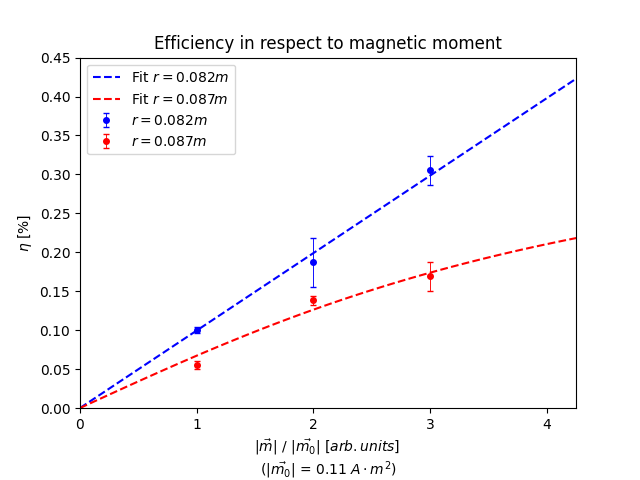

In [75]:
plt.figure()
plt.xticks([0, 1, 2, 3, 4])
plt.xlim(0,4.25)
plt.ylim(0.0,0.45)

cols2 = {
    0.082 : "b",
    0.087: "r"
}

for r in [0.082, 0.087]:
    dat_x = lmap(float, efficiencies.keys())
    dat_y = lmap(
        lambda k: efficiencies[k]["y"][efficiencies[k]["x"].index(r)],
        efficiencies.keys(),
    )
    
    (_, caps, _) = plt.errorbar(
        dat_x,
        dat_y,
        yerr=[
            lmap(
                lambda k: efficiencies[k]["yerr"][0][efficiencies[k]["x"].index(r)],
                efficiencies.keys(),
            ),
            lmap(
                lambda k: efficiencies[k]["yerr"][1][efficiencies[k]["x"].index(r)],
                efficiencies.keys(),
            ),
        ],
        fmt="o",
        markersize=4,
        c=cols2[r],
        capsize=2,
        elinewidth=0.65,
        label=f"$r = {r} m$",
    )

    for cap in caps:
        cap.set_markeredgewidth(1)
        
    # coef = np.polyfit(dat_x, dat_y, 1)
    # print(coef)
    # plt.plot(
    #     np.linspace(1,3, 100),
    #     lmap(lambda x: coef[0] * x + coef[1], np.linspace(1, 3, 100)),
    #     c=cols2[r],
    #     linestyle="--",
        
    # )
    
    def f (x, a, k, amp):
        return np.arctan(k*(x-0*a)) * amp * 2 / math.pi
    
    popt, pcov = opt.curve_fit(
        f,
        np.array(dat_x),
        np.array(dat_y),
        bounds=(
            [-3,0, 0],
            [3, 25,1000]
        ),
        maxfev = 100000
    )
    print(f"arctan({popt[1]} * (x - {popt[0]})) * {popt[2]}")
    plt.plot(
        np.linspace(0, 5, 100),
        lmap(lambda x: f(x, popt[0], popt[1], popt[2]), np.linspace(0, 5, 100)),
        c = cols2[r],
        linestyle = "--",
        label = f"Fit $r = {r}m$"
    )

m_0 = 1 / (math.pi * 4e-7) * 1.1049 * 0.005 ** 3
print(m_0)

plt.subplots_adjust(bottom=0.15)
plt.title("Efficiency in respect to magnetic moment")
plt.xlabel("$|\\vec{m}|$ / $|\\vec{m_0}|$ $[arb. units]$ \n($|\\vec{m_0}|$ = $" + '{0:.2f}'.format(m_0) + "$ $A \\cdot m^2$)")
plt.ylabel("$\\eta$ $[\%]$")
plt.legend()